회전익 고정익 구분하기 (머신러닝)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
FixedWing_df = pd.read_csv("FixedWing.csv")
MultiCopter_df = pd.read_csv("RotaryWing.csv")

In [4]:
FixedWing_df.columns

Index(['Company', 'Name', 'Length', 'Width', 'Weight'], dtype='object')

In [5]:
MultiCopter_df.columns

Index(['Company', 'Name', 'Length', 'Width', 'Height', 'Weight'], dtype='object')

In [6]:
FixedWing_df

,Company,Name,Length,Width,Weight
0,XK,A100 SU27,420,340,65
1,Samco,DUODRONE,1400,2200,3200
2,Uconsystem,RemoM-002,1440,1800,3500
3,Suewon Unmanned Tech,SCANNER,1200,2600,5000
4,KEVA Drone,KD-2 MAPPER,1100,1800,2000
5,Volantex,ASW28,1132,2540,1050
6,Suewon Unmanned Tech,VAM-400X,1000,1400,6000
7,FINEKOWAC,Canister Style,1500,1500,15000
8,Parrot,DISCO,580,1150,750
9,Samco,DUODRONE - VA,2600,1400,10000


In [7]:
MultiCopter_df

,Company,Name,Length,Width,Height,Weight
0,DJI,MAVIC 2 ZOOM,322.0,242.0,84.0,905
1,DJI,MAVIC 2 PRO,322.0,242.0,84.0,907
2,DJI,PHANTOM 4 PRO,289.5,289.5,196.0,1375
3,DJI,SPARK,143.0,143.0,55.0,300
4,DJI,INSPIRE 2,427.0,317.0,425.0,3440
5,DJI,MG-1P,1460.0,1460.0,616.0,9700
6,KaKBeir,SG700D,400.0,300.0,60.0,147
7,CERES,10s,1940.0,1680.0,460.0,14900
8,CERES,16H,1860.0,1860.0,600.0,17100
9,CERES,CERES3 Lite,365.0,365.0,110.0,992


In [8]:
FixedWingLength = FixedWing_df.loc[:,"Length"].to_list()
FixedWingWeight = FixedWing_df.loc[:, "Weight"].to_list()
MultiCopterLength = MultiCopter_df.loc[:, "Length"].to_list()
MultiCopterWeight = MultiCopter_df.loc[:, "Weight"].to_list()

In [9]:
type(FixedWingLength)

list

In [10]:
MultiCopterLength

[322.0,
 322.0,
 289.5,
 143.0,
 427.0,
 1460.0,
 400.0,
 1940.0,
 1860.0,
 365.0,
 1974.0,
 1590.0,
 730.0,
 1002.0,
 204.0,
 305.0,
 159.0,
 1800.0,
 860.0,
 1140.0,
 1225.0,
 350.0,
 1000.0,
 1100.0,
 643.0,
 535.0,
 330.0,
 1000.0,
 360.0,
 2123.0]

In [11]:
FixedWingLength

[420,
 1400,
 1440,
 1200,
 1100,
 1132,
 1000,
 1500,
 580,
 2600,
 3200,
 1200,
 1070,
 1270,
 1460,
 1070,
 1637,
 1100,
 855,
 1045,
 990,
 1030,
 1045,
 980,
 1075,
 405,
 620,
 1170]

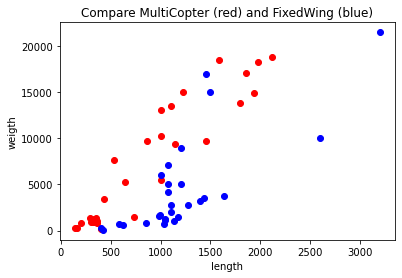

In [12]:
plt.scatter(MultiCopterLength, MultiCopterWeight, color ='red')
plt.scatter(FixedWingLength, FixedWingWeight, color= 'blue')
plt.title('Compare MultiCopter (red) and FixedWing (blue)')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [13]:
length = MultiCopterLength + FixedWingLength
weight = MultiCopterWeight + FixedWingWeight 

In [14]:
length

[322.0,
 322.0,
 289.5,
 143.0,
 427.0,
 1460.0,
 400.0,
 1940.0,
 1860.0,
 365.0,
 1974.0,
 1590.0,
 730.0,
 1002.0,
 204.0,
 305.0,
 159.0,
 1800.0,
 860.0,
 1140.0,
 1225.0,
 350.0,
 1000.0,
 1100.0,
 643.0,
 535.0,
 330.0,
 1000.0,
 360.0,
 2123.0,
 420,
 1400,
 1440,
 1200,
 1100,
 1132,
 1000,
 1500,
 580,
 2600,
 3200,
 1200,
 1070,
 1270,
 1460,
 1070,
 1637,
 1100,
 855,
 1045,
 990,
 1030,
 1045,
 980,
 1075,
 405,
 620,
 1170]

In [15]:
weight

[905,
 907,
 1375,
 300,
 3440,
 9700,
 147,
 14900,
 17100,
 992,
 18320,
 18500,
 1434,
 5500,
 790,
 945,
 249,
 13800,
 9700,
 9400,
 15000,
 1400,
 13100,
 13500,
 5250,
 7600,
 1200,
 10200,
 850,
 18800,
 65,
 3200,
 3500,
 5000,
 2000,
 1050,
 6000,
 15000,
 750,
 10000,
 21500,
 9000,
 4200,
 2750,
 17000,
 5000,
 3780,
 2750,
 830,
 1100,
 1700,
 760,
 1250,
 1540,
 7100,
 300,
 650,
 1500]

In [16]:
drone_data = [[ l, w,] for l, w in zip(length, weight)]

In [17]:
drone_data

[[322.0, 905],
 [322.0, 907],
 [289.5, 1375],
 [143.0, 300],
 [427.0, 3440],
 [1460.0, 9700],
 [400.0, 147],
 [1940.0, 14900],
 [1860.0, 17100],
 [365.0, 992],
 [1974.0, 18320],
 [1590.0, 18500],
 [730.0, 1434],
 [1002.0, 5500],
 [204.0, 790],
 [305.0, 945],
 [159.0, 249],
 [1800.0, 13800],
 [860.0, 9700],
 [1140.0, 9400],
 [1225.0, 15000],
 [350.0, 1400],
 [1000.0, 13100],
 [1100.0, 13500],
 [643.0, 5250],
 [535.0, 7600],
 [330.0, 1200],
 [1000.0, 10200],
 [360.0, 850],
 [2123.0, 18800],
 [420, 65],
 [1400, 3200],
 [1440, 3500],
 [1200, 5000],
 [1100, 2000],
 [1132, 1050],
 [1000, 6000],
 [1500, 15000],
 [580, 750],
 [2600, 10000],
 [3200, 21500],
 [1200, 9000],
 [1070, 4200],
 [1270, 2750],
 [1460, 17000],
 [1070, 5000],
 [1637, 3780],
 [1100, 2750],
 [855, 830],
 [1045, 1100],
 [990, 1700],
 [1030, 760],
 [1045, 1250],
 [980, 1540],
 [1075, 7100],
 [405, 300],
 [620, 650],
 [1170, 1500]]

In [18]:
drone_target = [1] * 30 + [0] * 28

In [19]:
print(drone_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
kn = KNeighborsClassifier()

In [21]:
print(drone_data)

[[322.0, 905], [322.0, 907], [289.5, 1375], [143.0, 300], [427.0, 3440], [1460.0, 9700], [400.0, 147], [1940.0, 14900], [1860.0, 17100], [365.0, 992], [1974.0, 18320], [1590.0, 18500], [730.0, 1434], [1002.0, 5500], [204.0, 790], [305.0, 945], [159.0, 249], [1800.0, 13800], [860.0, 9700], [1140.0, 9400], [1225.0, 15000], [350.0, 1400], [1000.0, 13100], [1100.0, 13500], [643.0, 5250], [535.0, 7600], [330.0, 1200], [1000.0, 10200], [360.0, 850], [2123.0, 18800], [420, 65], [1400, 3200], [1440, 3500], [1200, 5000], [1100, 2000], [1132, 1050], [1000, 6000], [1500, 15000], [580, 750], [2600, 10000], [3200, 21500], [1200, 9000], [1070, 4200], [1270, 2750], [1460, 17000], [1070, 5000], [1637, 3780], [1100, 2750], [855, 830], [1045, 1100], [990, 1700], [1030, 760], [1045, 1250], [980, 1540], [1075, 7100], [405, 300], [620, 650], [1170, 1500]]


In [22]:
##학습 시키기
kn.fit(drone_data, drone_target)

KNeighborsClassifier()

In [23]:
#평가
kn.score(drone_data, drone_target)

0.7758620689655172

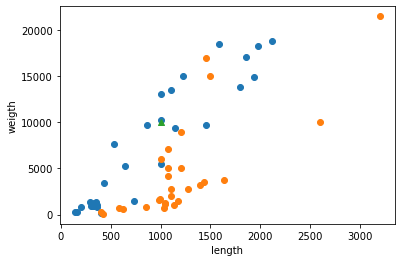

In [24]:
plt.scatter(MultiCopterLength, MultiCopterWeight)
plt.scatter(FixedWingLength, FixedWingWeight)
plt.scatter(1000,10000, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [25]:
kn.predict([[1000, 10000]])

array([1])

In [26]:
# 1000이고 무게는 10000인 것은 고정익으로예측함

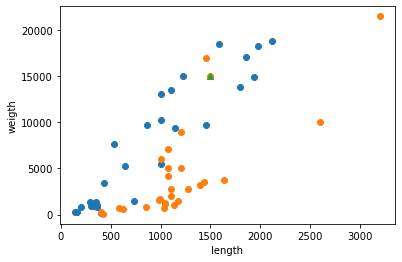

In [27]:
plt.scatter(MultiCopterLength, MultiCopterWeight)
plt.scatter(FixedWingLength, FixedWingWeight)
plt.scatter(1500, 15000, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [28]:
kn.predict([[1000,15000]])

array([1])

In [29]:
kn10 = KNeighborsClassifier(n_neighbors=10)

In [30]:
kn10.fit(drone_data, drone_target)

KNeighborsClassifier(n_neighbors=10)

In [31]:
kn10.score(drone_data, drone_target)

0.7931034482758621

In [32]:
kn3=KNeighborsClassifier(n_neighbors=3)
kn3.fit(drone_data, drone_target)

KNeighborsClassifier(n_neighbors=3)

In [33]:
kn3.score(drone_data, drone_target)

0.8275862068965517

In [34]:
kn4=KNeighborsClassifier(n_neighbors=4)
kn4.fit(drone_data, drone_target)

KNeighborsClassifier(n_neighbors=4)

In [35]:
kn4.score(drone_data, drone_target)

0.8103448275862069

In [36]:
kn2=KNeighborsClassifier(n_neighbors=2)
kn2.fit(drone_data, drone_target)

KNeighborsClassifier(n_neighbors=2)

In [37]:
kn2.score(drone_data, drone_target)

0.8620689655172413

# 수상한 드론을 회전익과 고정익이라고 다르게 예측함kn 2,  3, 4 , 5 

In [38]:
kn2.predict([[1500,150000]])

array([0])

In [39]:
kn3.predict([[1500,150000]])

array([1])

In [40]:
kn4.predict([[1500,150000]])

array([1])